## Importing Required Libraries

In [70]:
# Data handling
import pandas as pd
import numpy as np

In [71]:
# Visualization
import matplotlib.pyplot as plt

In [72]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [74]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
# Saving models
import joblib

## Load Featured Dataset

In [76]:
df = pd.read_csv("../data/featured/featured_data.csv")
df.head()

,elapsed_time_seconds,is_correct,question_success_rate,avg_time_per_question,user_accuracy,avg_user_time,attempt_order,difficulty_proxy
0,0.7,1,0.400000,0.7,0.721811,0.699906,1,0.420000
1,0.7,1,0.857143,0.7,0.721811,0.699906,2,0.100000
2,0.7,1,0.500000,0.7,0.721811,0.699906,3,0.350000
3,0.7,0,0.608696,0.7,0.721811,0.699906,4,0.273913
4,0.7,0,0.431818,0.7,0.721811,0.699906,5,0.397727


------------------

In [77]:
MAX_TIME = 700
df["elapsed_time_capped"] = df["elapsed_time_seconds"].clip(upper=MAX_TIME)



columns_to_drop = [
    "question_success_rate",
    "avg_time_per_question",
    "elapsed_time_seconds"
]

df.drop(columns=columns_to_drop,inplace=True)

df.head()





,is_correct,user_accuracy,avg_user_time,attempt_order,difficulty_proxy,elapsed_time_capped
0,1,0.721811,0.699906,1,0.420000,0.7
1,1,0.721811,0.699906,2,0.100000,0.7
2,1,0.721811,0.699906,3,0.350000,0.7
3,0,0.721811,0.699906,4,0.273913,0.7
4,0,0.721811,0.699906,5,0.397727,0.7


--------------

## Define Features (X) and Target (y)

In [78]:
X = df.drop(columns=["difficulty_proxy"])
y = df["difficulty_proxy"]

## Train / Test Split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


## Feature Scaling
+ Feature scaling is important for linear models.

+ Tree-based models don’t require scaling, but it does no harm.

+ We fit the scaler on training data only to avoid data leakage.

In [80]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Model 1: Linear Regression (Baseline)

In [81]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_preds = lr.predict(X_test_scaled)

## Train Model 2: Random Forest Regressor

In [82]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


## Train Model 3: Gradient Boosting Regressor

In [83]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

gb_preds = gb.predict(X_test)

## Model Evaluation Function

In [84]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))


In [85]:
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, gb_preds, "Gradient Boosting")



Linear Regression
MAE : 0.09166050706029305
RMSE: 0.11032157665545218
R2  : 0.15367037332822986

Random Forest
MAE : 0.08500821229890569
RMSE: 0.10968811745073931
R2  : 0.16336160761164353

Gradient Boosting
MAE : 0.08260373489333954
RMSE: 0.10172353202677271
R2  : 0.2804491562350475


## Feature Importance

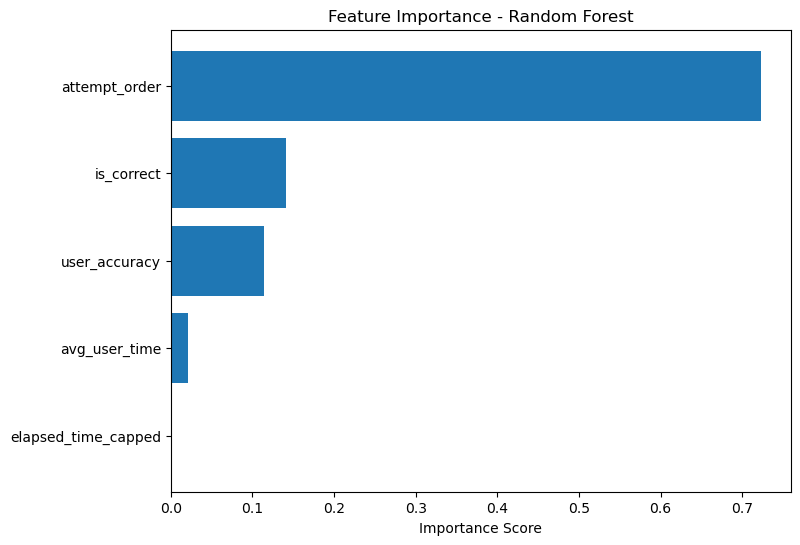

In [86]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()